In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대,직업
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대,NaN
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대,건물 관리원 및 검표원
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대,전기공
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대,금속기계 부품 조립원
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대,고객 상담 및 기타 사무원
...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대,컴퓨터 시스템 및 소프트웨어 전문가
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대,NaN
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대,종교 관련 종사자


In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)

In [4]:
# < 8. 성별 직업의 빈도 차이 >
# 성별 직업의 빈도 상위 10개
# 1. 변수 검토 및 전처리(성별, 직업)
welfare['성별'].dtypes # dtypes('float64')
welfare['성별'].value_counts()
# female    9120
# male      7471rufcmrcl dltkdg

# 이상치 데이터
welfare['성별'] = np.where(welfare['성별'] == 9, np.nan, welfare['성별'])

# 성별 변수 값을 변경 됨.
# 1-2. 직업 변수 확인
welfare['직업'].value_counts()
welfare

,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대,직업
0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대,NaN
1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대,건물 관리원 및 검표원
2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대,전기공
3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대,금속기계 부품 조립원
4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대,고객 상담 및 기타 사무원
...,...,...,...,...,...,...,...,...,...,...,...
16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대,컴퓨터 시스템 및 소프트웨어 전문가
16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대,NaN
16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN,NaN
16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대,종교 관련 종사자


In [5]:
# 2. 분석표(통계요약표)
# 남성의 직업 빈도 top20
job_male_top20 = welfare.dropna(subset=['직업']) \
                        .query('성별 == "남성"') \
                        .groupby('직업', as_index=False) \
                        .agg(건수=('직업', 'count')) \
                        .sort_values('건수', ascending=False) \
                        .head(20)
job_male_top20

,직업,건수
107,작물 재배 종사자,651
104,자동차 운전원,235
11,경영 관련 사무원,210
127,청소원 및 환경미화원,184
46,매장 판매 종사자,153
34,기타 서비스 관련 단순 종사자,109
89,영업 종사자,107
4,건설 및 광업 단순 종사자,101
120,제조 관련 단순 종사자,96
142,행정 사무원,87


In [6]:
# 여성의 직업 빈도 top20
job_female_top20 = welfare.dropna(subset=['직업']) \
                        .query('성별 == "여성"') \
                        .groupby('직업', as_index=False) \
                        .agg(건수=('직업', 'count')) \
                        .sort_values('건수', ascending=False) \
                        .head(20)
job_female_top20

,직업,건수
86,작물 재배 종사자,597
96,청소원 및 환경미화원,493
36,매장 판매 종사자,223
33,돌봄 및 보건 서비스 종사자,223
26,기타 서비스 관련 단순 종사자,206
112,회계 및 경리 사무원,191
60,식음료 서비스 종사자,140
92,제조 관련 단순 종사자,128
93,조리사,126
76,음식 관련 단순 종사자,108


<Axes: xlabel='건수', ylabel='직업'>

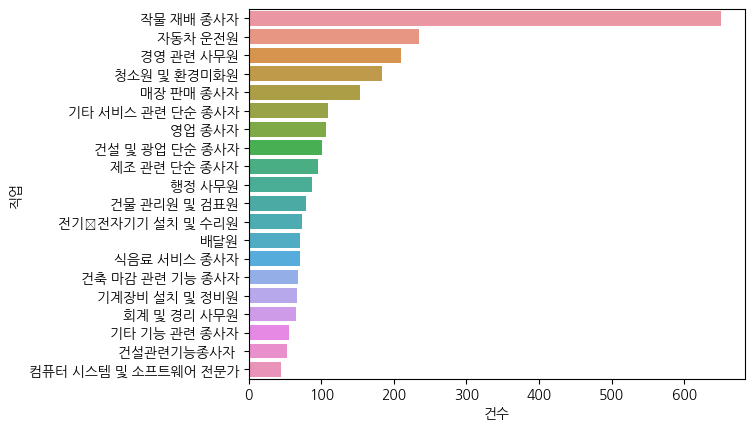

In [7]:
# 3. 시각화 - barplot
# 남성의 직업 빈도 top20
sns.barplot(data=job_male_top20, x='건수', y='직업')

<Axes: xlabel='건수', ylabel='직업'>

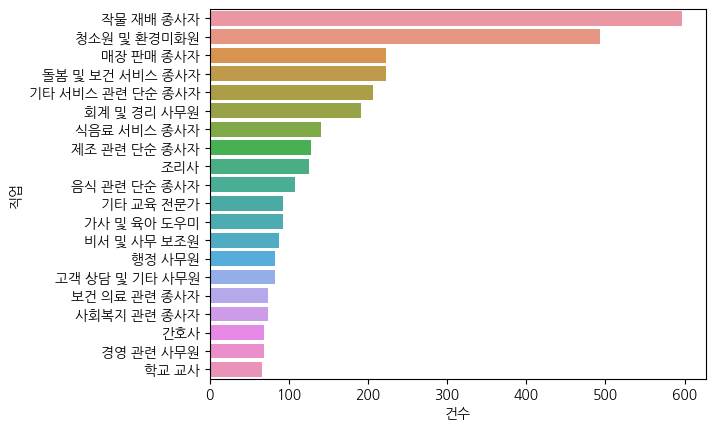

In [8]:
# 여성의 직업 빈도 top20
sns.barplot(data=job_female_top20, x='건수', y='직업')

In [9]:
# 4. 분석 결괴
# 남성: 작물 재배 종사자, 자동차 운전원, 경영 관련 사무원, 청소원 및 환경미화원, 매장 판맨 종사자 등 순으로 많은 직업을 가지고 있음.
# 여성: 작물 재배 종사자, 청소원 및 환경미화원, 매장 판맨 종사자, 돌봄 및 보건 서비스 종사자, 회계 및 경리 사무원 등 순으로 많은 직업을 가짐.

In [10]:
welfare.to_csv('welfare.csv') # csv 파일로 저장

In [11]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대,직업
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대,NaN
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대,건물 관리원 및 검표원
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대,전기공
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대,금속기계 부품 조립원
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대,고객 상담 및 기타 사무원
...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대,컴퓨터 시스템 및 소프트웨어 전문가
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대,NaN
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대,종교 관련 종사자
